In [16]:
import numpy as np
import pandas as pd
import re
import nltk
import sklearn.tree as KNeighborsClassifier

In [17]:
#Data Collection
#mengimpor dataset dan menyimpan dalam dataframe
path = "..\Dataset\API_Kaggle\sentiment_analysis.csv"
corpus_df = pd.read_csv(path)
corpus_df

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram
...,...,...,...,...,...,...,...
494,2015,10,18,night,"According to , a quarter of families under six...",negative,Twitter
495,2021,2,25,morning,the plan to not spend money is not going well,negative,Instagram
496,2022,5,30,noon,uploading all my bamboozle pictures of facebook,neutral,Facebook
497,2018,8,10,night,congratulations ! you guys finish a month ear...,positive,Twitter


In [18]:
#Data Preprocesing
nltk.download('stopwords')
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
#lower case and remove special characters/whitespaces
    doc = re.sub(r'[^a-zA-Z\s]','', doc, re. I|re.A)
    doc = doc. lower()
    doc = doc.strip()
    #tokenize dokumen
    tokens = wpt.tokenize(doc)
    #filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    #re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

corpus = np.array(corpus_df['text' ])
normalize_corpus = np.vectorize(normalize_document)
norm_corpus = normalize_corpus(corpus)
norm_corpus

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\santo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


array(['great day looks like dream', 'feel sorry miss sea beach',
       'dont angry',
       'attend class listening teachers reading slide nonsence',
       'want go let go', 'night feeling neutral',
       'feedings baby fun smiles coos', 'soooo high', '',
       'today first time arrive boat amazing journey',
       'love something like emc rules',
       'really really like song cardigan taylor swift',
       'sharpie running dangerously low ink',
       'want go music tonight lost voice', 'always somewhere miss',
       'dont distrube', 'dont care', 'ive sick past days',
       'im come back home past job really good time',
       'never fall love found', 'oh maya im sorry hope find soon',
       'playing kids amazing',
       'cleaning house family comming later today',
       'tried shtdown pc accenditenly click restart button really disgusting',
       'follow follow', 'amazing game playing everyday', 'im sorry',
       'im village hardly found internate feeling gloomy',
     

In [19]:
#Feature Weighting dengan TF-IDF
from sklearn. feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectors = vectorizer. fit_transform(norm_corpus)
feature_names = vectorizer.get_feature_names_out()
dense = vectors. todense ()
denselist = dense. tolist()
X = pd. DataFrame(denselist, columns=feature_names)
X

,aaaaaah,aaaaaw,aawww,accenditenly,accepts,according,account,achievement,act,actress,...,yesterday,yet,yor,youd,youll,youre,youtube,youve,yum,zero
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,0.0,0.0,0.0,0.0,0.0,0.421823,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
495,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
496,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
#Memilih kolom target klasifikasi
y = corpus_df [ 'sentiment' ]
y.head()

0    positive
1    positive
2    negative
3    negative
4    negative
Name: sentiment, dtype: object

In [21]:
#Membagi dataset menjadi data latih dan data uji
#dengan perbandingan 70% : 30%
from sklearn.model_selection import train_test_split

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

print ("Ukuran X_trainset = ", X_trainset.shape)
print ("Ukuran y_trainset = ", y_trainset. shape)

print ("Ukuran X_testset = ", X_testset.shape)
print ("Ukuran y_testset = ", y_testset.shape)

Ukuran X_trainset =  (349, 1278)
Ukuran y_trainset =  (349,)
Ukuran X_testset =  (150, 1278)
Ukuran y_testset =  (150,)


In [22]:
#Data Classification
# Import KNeighborsClassifier from the correct module
from sklearn.neighbors import KNeighborsClassifier

#Membangun model klasifikasi dengan K-Nearest Neighbors
SentimentTree = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto',
leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

#Melatih model dengan data latih
SentimentTree.fit(X_trainset,y_trainset)

#Memprediksi data uji dengan model
y_predSentiment = SentimentTree.predict(X_testset)

#Menampilkan label uji yang seharusnya
#dan label hasil prediksi
result = pd.DataFrame({'True Label': y_testset, 'Predicted Label': y_predSentiment})
print(result.head())

#Menghitung nilai akurasi prediksi model
from sklearn import metrics
print("K-Nearest Neighbors's Accuracy: ", metrics.accuracy_score(y_testset, y_predSentiment))

    True Label Predicted Label
130    neutral         neutral
290   negative         neutral
37     neutral         neutral
239   positive         neutral
191   positive         neutral
K-Nearest Neighbors's Accuracy:  0.44


In [23]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
#Membangun model klasifikasi dengan K-Nearest Neighbors
    SentimentTree = KNeighborsClassifier(n_neighbors=n, weights='uniform', algorithm='auto',
    leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
    #Melatih model dengan data latih
    SentimentTree.fit(X_trainset,y_trainset)
    #Memprediksi data uji dengan model
    y_predSentiment = SentimentTree.predict(X_testset)
    mean_acc[n-1] = metrics.accuracy_score(y_testset, y_predSentiment)
    std_acc[n-1]=np.std(y_predSentiment == y_testset)/np.sqrt(y_predSentiment.shape[0])

mean_acc

array([0.6       , 0.5       , 0.44666667, 0.44      , 0.44      ,
       0.46666667, 0.52666667, 0.52666667, 0.52666667])

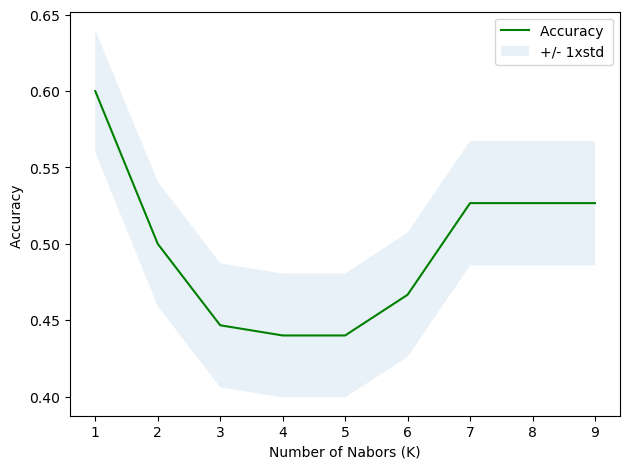

In [24]:
import matplotlib.pyplot as plt

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 1xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [25]:
print("The Best Accuracy was with", mean_acc.max(), "with K=", mean_acc.argmax()+1)

The Best Accuracy was with 0.6 with K= 1
